# Combates de boxeo
Datos históricos de combates ( 1993 - 2019 )



## Descripción de los datasets

El dataset [dataset.csv](./dataset.csv) contiene 5144 registros con información relacionada con combates de boxeo. Cada registro hace referencia a un combate, con información de los luchadores, tipo de combate, resultado del combate, etc. A continuación describimos algunos de los campos más importantes:


* `R_fighter` : nombre del luchador de la esquina roja
* `B_fighter` : nombre del luchador de la esquina azul


Los prefijos `R_` y  `B_`  se refieren a los luchadores de las esquinas rojas y azules respectivamente.

* `Referee` : nombre del árbitro del combate
* `date` : fecha de celebración del combate 
* `location` : es el lugar en el que se produjo el evento
* `Format` : es el formato de la pelea (3 asaltos, 5 asaltos etc.)
* `weight_class` : categoría de la pelea (peso ligero, etc)
* `win_by` : es un método de ganar (KO, etc.)
* `Winner` : es el nombre del ganador del combate
* `last_round` : es el último asalto del combate


Por otro lado, el dataset [details.csv](./details.csv) contiene infomación de luchadores de boxeo, el nombre, altura y el peso.

## Ejercicio

### Carga de datos.

Crea dos dataframes:

* Dataframe llamado `combates` con los datos del fichero `dataset.csv`.
* Dataframe llamado `luchadores` con los datos del fichero `details.csv`.



In [3]:
# Sol:
import pandas as pd
import numpy as np

luchadores = pd.read_csv('details.csv')
luchadores

,fighter_name,Weight,Height
0,AJ Fonseca,145 lbs.,"5' 4"""
1,AJ Matthews,185 lbs.,"5' 11"""
2,AJ McKee,145 lbs.,"5' 10"""
3,AJ Siscoe,135 lbs.,"5' 7"""
4,Aalon Cruz,145 lbs.,"6' 0"""
...,...,...,...
3308,Zelim Imadaev,170 lbs.,"6' 0"""
3309,Zhang Lipeng,155 lbs.,"5' 11"""
3310,Zoila Frausto,135 lbs.,"5' 4"""
3311,Zu Anyanwu,251 lbs.,"6' 1"""


In [5]:
# Sol:

combates = pd.read_csv('dataset.csv', sep = ';')
combates

,R_fighter,B_fighter,win_by,last_round,last_round_time,Format,Referee,date,location,Winner,weight_class,title_bout
0,Henry Cejudo,Marlon Moraes,KO/TKO,3,4:51,5 Rnd (5-5-5-5-5),Marc Goddard,"June 08, 2019","Chicago, Illinois, USA",Henry Cejudo,Bantamweight,True
1,Valentina Shevchenko,Jessica Eye,KO/TKO,2,0:26,5 Rnd (5-5-5-5-5),Robert Madrigal,"June 08, 2019","Chicago, Illinois, USA",Valentina Shevchenko,Women's Flyweight,True
2,Tony Ferguson,Donald Cerrone,TKO - Doctor's Stoppage,2,5:00,3 Rnd (5-5-5),Dan Miragliotta,"June 08, 2019","Chicago, Illinois, USA",Tony Ferguson,Lightweight,False
3,Jimmie Rivera,Petr Yan,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Kevin MacDonald,"June 08, 2019","Chicago, Illinois, USA",Petr Yan,Bantamweight,False
4,Tai Tuivasa,Blagoy Ivanov,Decision - Unanimous,3,5:00,3 Rnd (5-5-5),Dan Miragliotta,"June 08, 2019","Chicago, Illinois, USA",Blagoy Ivanov,Heavyweight,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5139,Gerard Gordeau,Kevin Rosier,KO/TKO,1,0:59,No Time Limit,Joao Alberto Barreto,"November 12, 1993","Denver, Colorado, USA",Gerard Gordeau,Open Weight,False
5140,Ken Shamrock,Patrick Smith,Submission,1,1:49,No Time Limit,Joao Alberto Barreto,"November 12, 1993","Denver, Colorado, USA",Ken Shamrock,Open Weight,False
5141,Royce Gracie,Art Jimmerson,Submission,1,2:18,No Time Limit,Joao Alberto Barreto,"November 12, 1993","Denver, Colorado, USA",Royce Gracie,Open Weight,False
5142,Kevin Rosier,Zane Frazier,KO/TKO,1,4:20,No Time Limit,Joao Alberto Barreto,"November 12, 1993","Denver, Colorado, USA",Kevin Rosier,Open Weight,False


###  Celebración de los combates

La columna `location` del dataframe `combates` recoge información del lugar donde se celebran los combates. Este campo recoge la ciudad, el estado y el país. 

a) Modifica el DataFrame `combates`. Crear una nueva columna denominada `Country` con información únicamente del nombre del país.

b) Muestra un listado de paises distintos donde se han celebrado combates.

c) Calcula el número de combates celebrados en cada país. Representa gráficamente.

In [20]:
# Sol:

combates['location'] # vemos que el país está al final

combates['country'] = combates['location'].map(lambda valor : valor.split(',')[-1])   # para acceder al último solo, -1
# combates.groupby('country').date.count()     # lo puedo hacer así, por ejemplo, con date, para que cuente el número de filas

paises = combates.country.value_counts()      # lo bueno de value count respecto a groupby es que te lo da ordenado
paises

 USA                     3392
 Brazil                   405
 Canada                   342
 United Kingdom           255
 Australia                162
 Japan                     82
 Sweden                    72
 Germany                   67
 Mexico                    60
 China                     51
 Singapore                 34
 Ireland                   30
 Netherlands               25
 Poland                    23
 Russia                    23
 New Zealand               21
 United Arab Emirates      18
 Croatia                   13
 Chile                     13
 Czech Republic            13
 Argentina                 12
 Philippines               12
 South Korea               11
 Puerto Rico                8
Name: country, dtype: int64

In [26]:
list(paises.index.map(str.strip))          # sin paréntesis porque es un atributo, y le añadimos un map para quitarle el espacio

['USA',
 'Brazil',
 'Canada',
 'United Kingdom',
 'Australia',
 'Japan',
 'Sweden',
 'Germany',
 'Mexico',
 'China',
 'Singapore',
 'Ireland',
 'Netherlands',
 'Poland',
 'Russia',
 'New Zealand',
 'United Arab Emirates',
 'Croatia',
 'Chile',
 'Czech Republic',
 'Argentina',
 'Philippines',
 'South Korea',
 'Puerto Rico']

<Axes: >

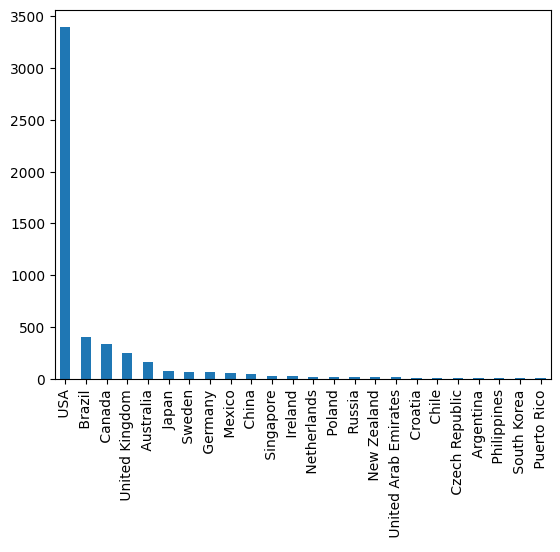

In [31]:
import matplotlib.pyplot as plt

figura, g = plt.subplots()

paises.plot(ax = g, kind = 'bar')

### Peso de los luchadores 

En el dataframe `luchadores` se encuentran los datos asociados a los participantes en combates. En particular recoje el peso de los participantes expresado en libras. 

a) Modifica el DataFrame `luchadores`. Crea una nueva columna llamada `Weight gr` que represente el peso del luchador en gramos. 
(1 libra son 453.59 gramos).

b) Muestra un gráfico de frecuencias de la variable `Weight gr`. Discute la gráfica obtenida.

c) Muestra el dataframe `luchadores` ordenado por peso (de mayor a menor).

In [42]:
# Sol:

luchadores['Weight'] = luchadores['Weight'].fillna('0 lbs.') # para sustituir los na

luchadores['Weight lbs'] = luchadores['Weight'].map(lambda valor : int(valor.split(' ')[0]))

luchadores['Weight gr'] = luchadores['Weight lbs'] * 453.59

luchadores

,fighter_name,Weight,Height,Weight lbs,Weight gr
0,AJ Fonseca,145 lbs.,"5' 4""",145,65770.55
1,AJ Matthews,185 lbs.,"5' 11""",185,83914.15
2,AJ McKee,145 lbs.,"5' 10""",145,65770.55
3,AJ Siscoe,135 lbs.,"5' 7""",135,61234.65
4,Aalon Cruz,145 lbs.,"6' 0""",145,65770.55
...,...,...,...,...,...
3308,Zelim Imadaev,170 lbs.,"6' 0""",170,77110.30
3309,Zhang Lipeng,155 lbs.,"5' 11""",155,70306.45
3310,Zoila Frausto,135 lbs.,"5' 4""",135,61234.65
3311,Zu Anyanwu,251 lbs.,"6' 1""",251,113851.09


###   Calzoncillo rojo

Deseamos conocer en cuántos combates ha sido victorioso el luchador de calzoncillo rojo.



In [5]:
# Sol:


###  Ganadores !

a) Genera un listado de luchadores que hayan ganado por `KO/TKO` .


b) Genera un gráfico que muestre el número de combates  ganado por `KO/TKO` por cada uno de los países. 

In [6]:
# Sol:


###  Analisis categoría 

a) Muestra un listado ordenado por número de combates para cada categoría

b) Muestra gráficamente el número de combates por categoría. Discute 


In [7]:
# Sol:


In [8]:
import matplotlib.pyplot as plt


### Años
Muestra los datos de los combates ordenados por año y país de forma descendente.

In [9]:
# Sol:
